<a href="https://colab.research.google.com/github/JackMyles/CS156a-LearningFromData/blob/main/cs156a_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 156a HW 2

#### 1. The average value of νmin is closest to:

[a] 0

[b] 0.01

[c] 0.1

[d] 0.5

[e] 0.67

#### Answer:
B

In [ ]:
import random
import numpy as np

def flip_coin():
    return random.choice([0, 1])

def experiment():
    coins = np.random.randint(0, 2, [1000, 10])
    c_1 = coins[0]
    c_rand = coins[random.randrange(0, 1000)]
    c_min = coins[np.argmin(np.sum(coins, axis=1))]

    v_1 = np.mean(c_1)
    v_rand = np.mean(c_rand)
    v_min = np.mean(c_min)

    return (v_1, v_rand, v_min)

v_1_means = []
v_rand_means = []
v_min_means = []
N = 100000
print("Processing:", end=" ")
for i in range(N):
    print(str(int(i / N * 100)), end="% ") if (i % (N // 20) == 0) else None
    result = experiment()
    v_1_means.append(result[0])
    v_rand_means.append(result[1])
    v_min_means.append(result[2])

print(f"100%\nAverage v_1: {np.mean(v_1_means)}")
print(f"Average v_rand: {np.mean(v_rand_means)}")
print(f"Average v_min: {np.mean(v_min_means)}")

Processing: 0% 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 100%
Average v_1: 0.49978
Average v_rand: 0.4996999999999999
Average v_min: 0.037618000000000006


Average v_min ~ 0.01

#### 2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding Inequality?

[a] c1 only

[b] crand only

[c] cmin only

[d] c1 and crand

[e] cmin and crand

#### Answer:
D

Hoeffding's Inequality is P[|ν − µ| > ε] ≤ 2e^(−2ε^2N). In this case, µ is 0.5 since the experiment involves flipping a coin, which has a 50% probability of being either heads or tails. Therefore, ν must be close to 0.5 to satisfy the single bin Hoeffding Inequality. As seen above, the ν distribution of c1 and crand are very close to 0.5, so they satifsy the single bin Hoeffding Inequality. The process of choosing c1 and crand is unbiased, so they should have a distribution comparable to the normal distribution of repeatedly flipping a coin. The ν distribution of cmin is not close to 0.5, so it does not satisfy the single bin Hoeffding Inequality. However, this makes sense given that cmin was chosen with a bias towards the coin that had the least heads. This conclusion is further visualized below in the distribution histograms of each coin, showing the expected binomial distribution of c1 and crand.

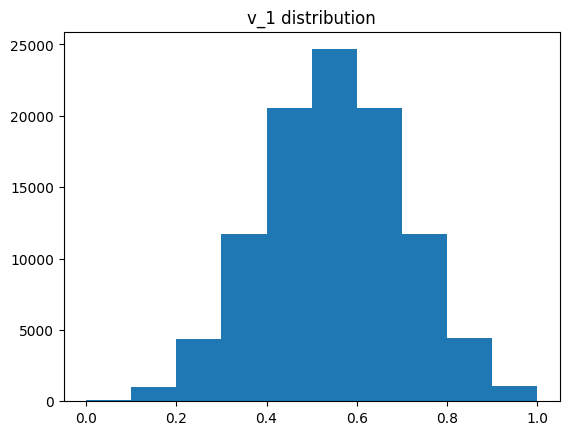

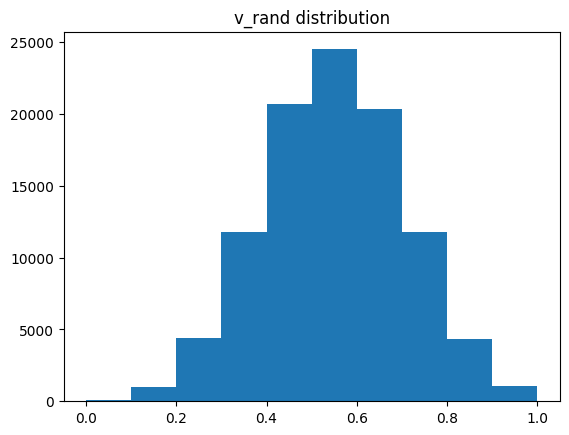

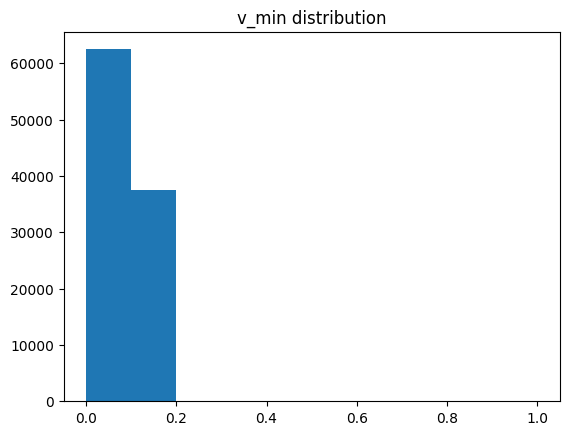

In [ ]:
import matplotlib.pyplot as plt

v_1_means = []
v_rand_means = []
v_min_means = []

for i in range(N):
    result = experiment()

    v_1_means.append(result[0])
    v_rand_means.append(result[1])
    v_min_means.append(result[2])

plt.hist(v_1_means, bins=np.arange(0, 1.1, 0.1).round(2))
plt.title("v_1 distribution")
plt.show()

plt.hist(v_rand_means, bins=np.arange(0, 1.1, 0.1).round(2))
plt.title("v_rand distribution")
plt.show()

plt.hist(v_min_means, bins=np.arange(0, 1.1, 0.1).round(2))
plt.title("v_min distribution")
plt.show()

#### 3. What is the probability of error that h makes in approximating y? Hint: Two wrongs can make a right!

[a] µ

[b] λ

[c] 1 − µ

[d] (1 − λ) * µ + λ * (1 − µ)

[e] (1 − λ) * (1 − µ) + λ * µ

#### Answer:
E
<div>
<img src="attachment:dabc635c-f314-447f-8175-f867b1c715b0.jpeg" width="200"/>
</div>
The table above represents the four possible cases. Since h and f are binary functions, there will be no error if y = f(x) and h = f or if y != f(x) and h != f. For one error case, h != f (probability µ) and y = f(x) (probability λ). For the other error case, h = f (probability 1 - µ) and y != f(x) (probability 1 - λ). Therefore the total probability of error is µ * λ + (1 − µ) * (1 − λ).

#### 4. At what value of λ will the performance of h be independent of µ?

[a] 0

[b] 0.5

[c] 1/√2

[d] 1

[e] No values of λ

#### Answer:
B

P(error) = (1 − λ) * (1 − µ) + λ * µ

P(error) = 1 - λ − µ + µλ + µλ

P(error) = 1 - λ - µ(1 - 2λ)

1 - 2λ = 0

λ = 1/2 = 0.5

Therefore, when λ = 0.5, µ has no effect on the probability of error, meaning the performance of h is independent of µ.

#### 5. Take N = 100. Use Linear Regression to find g and evaluate Ein, the fraction of in-sample points which got classified incorrectly. Repeat the experiment 1000 times and take the average (keep the f’s and g’s as they will be used again in Problem 6). Which of the following values is closest to the average Ein?

[a] 0

[b] 0.001

[c] 0.01

[d] 0.1

[e] 0.5

#### Answer:
C

(Code under problem 6)

#### 6. Now, we go to out-of-sample error. For each run of the experiment in Problem 5, generate 1000 fresh points and use them to estimate Eout (fraction of misclassified points among the 1000) using the g that you got in that run. Which value is closest to the average of Eout over the 1000 runs of the experiment?

[a] 0

[b] 0.001

[c] 0.01

[d] 0.1

[e] 0.5

#### Answer:
C

In [ ]:
def get_y(X, m, b):
    y = []
    for p in X:
        if p[2] >= (m * p[1] + b):
            y.append(1)
        else:
            y.append(-1)
    return y

def get_E_in(X, y, w):
    incorrect = 0
    for i, p in enumerate(X):
        if np.sign(np.dot(w.T, p)) != y[i]:
            incorrect += 1

    return incorrect / len(X)

def get_E_out(N, m, b, w):
    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    y = get_y(X, m, b)
    incorrect = 0
    for i, p in enumerate(X):
        if np.sign(np.dot(w.T, p)) != y[i]:
            incorrect += 1

    return incorrect / len(X)

N = 100
RUNS = 1000
E_in_total = 0
E_out_total = 0

for _ in range(RUNS):
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    b = p1[1] - m * p1[0]

    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    y = get_y(X, m, b)

    x_dag = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(x_dag, y)

    E_in_total += get_E_in(X, y, w)
    E_out_total += get_E_out(1000, m, b, w)

E_in_avg = E_in_total / RUNS
print(f"Average of E_in for N={N} training points over {RUNS} runs: {E_in_avg}")

E_out_avg = E_out_total / RUNS
print(f"Average of E_out for N={N} training points over {RUNS} runs: {E_out_avg}")

Average of E_in for N=100 training points over 1000 runs: 0.039290000000000005
Average of E_out for N=100 training points over 1000 runs: 0.048444999999999995


E_in ~ 0.01

E_out ~ 0.01

#### 7. Now, take N = 10. After finding the weights using Linear Regression, use them as a vector of initial weights for the Perceptron Learning Algorithm. Run PLA until it converges to a final vector of weights that completely separates all the in-sample points. Among the choices below, what is the closest value to the average number of iterations (over 1000 runs) that PLA takes to converge? (When implementing PLA, have the algorithm choose a point randomly from the set of misclassified points at each iteration)

[a] 1

[b] 15

[c] 300

[d] 5000

[e] 10000

#### Answer:
A

In [ ]:
def h(p, w):
    return np.sign(np.dot(w.T, p))

def perceptron(X, y, w):

    def converges():
        for i, p in enumerate(X):
            if h(p, w) != y[i]:
                return False
        return True

    runs = 0
    while not converges():
        runs += 1

        correct = []
        incorrect = []

        for i, p in enumerate(X):
            if h(p, w) == y[i]:
                correct.append(i)
            else:
                incorrect.append(i)

        update = random.choice(incorrect)

        for i in range(len(w)):
            w[i] += y[update] * X[update][i]
    return runs

N = 10
RUNS = 1000
total_runs = 0

for _ in range(RUNS):
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    b = p1[1] - m * p1[0]

    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    y = get_y(X, m, b)

    x_dag = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(x_dag, y)

    total_runs += perceptron(X, y, w)

print(f'Average iterations for PLA to converge for N={N} training points over {RUNS} runs is {total_runs / RUNS}')

Average iterations for PLA to converge for N=10 training points over 1000 runs is 5.279


~ 1

#### 8. Carry out Linear Regression without transformation, i.e., with feature vector: (1, x1, x2), to find the weight w. What is the closest value to the classification in-sample error Ein? (Run the experiment 1000 times and take the average Ein to reduce variation in your results.)

[a] 0

[b] 0.1

[c] 0.3

[d] 0.5

[e] 0.8

#### Answer:
D

In [ ]:
def get_y(X):
    y = []
    for p in X:
        y.append(np.sign(p[1]**2 + p[2]**2 - 0.6))
    return y

N = 1000
RUNS = 1000
E_in_total = 0

for _ in range(RUNS):
    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    y = get_y(X)
    noise = np.random.randint(0, len(y), len(y) // 10)
    for idx in noise:
        y[idx] = -y[idx]

    x_dag = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(x_dag, y)

    E_in_total += get_E_in(X, y, w)

E_in_avg = E_in_total / RUNS
print(f"Average of E_in for N={N} training points over {RUNS} runs: {E_in_avg}")

Average of E_in for N=1000 training points over 1000 runs: 0.5070880000000005


~ 0.5

#### 9. Now, transform the N = 1000 training data into the following nonlinear feature vector: (1, x1, x2, x1x2, x1^2, x2^2), Find the vector ˜w that corresponds to the solution of Linear Regression. Which of the following hypotheses is closest to the one you find? Closest here means agrees the most with your hypothesis (has the highest probability of agreeing on a randomly selected point). Average the probability over 1000 runs to make sure your answer is stable.

[a] g(x1, x2) = sign(−1 − 0.05x1 + 0.08x2 + 0.13x1x2 + 1.5x1^2 + 1.5x2^2)

[b] g(x1, x2) = sign(−1 − 0.05x1 + 0.08x2 + 0.13x1x2 + 1.5x1^2 + 15x2^2)

[c] g(x1, x2) = sign(−1 − 0.05x1 + 0.08x2 + 0.13x1x2 + 15x1^2 + 1.5x2^2)

[d] g(x1, x2) = sign(−1 − 1.5x1 + 0.08x2 + 0.13x1x2 + 0.05x1^2 + 0.05x2^2)

[e] g(x1, x2) = sign(−1 − 0.05x1 + 0.08x2 + 1.5x1x2 + 0.15x1^2 + 0.15x2^2)

#### Answer:

A

In [ ]:
N = 1000
RUNS = 1000
w_total = np.zeros(6)

for _ in range(RUNS):
    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    bias = X.T[0]
    X1 = X.T[1]
    X2 = X.T[2]
    X = np.array([bias, X1, X2, X1 * X2, X1 ** 2, X2 ** 2]).T
    y = get_y(X)
    noise = np.random.randint(0, len(y), len(y) // 10)
    for idx in noise:
        y[idx] = -y[idx]

    x_dag = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(x_dag, y)
    w_total = np.add(w_total, w)

w_avg = w_total / RUNS
print("The average weights are approximately: ", end="")
for w in w_avg:
    print(w.round(2), end = "   ")

The average weights are approximately: -1.02   -0.0   -0.0   0.0   1.59   1.6   

~ -1, -0.05, 0.08, 0.13, 1.5, 1.5

#### 10. What is the closest value to the classification out-of-sample error Eout of your hypothesis from Problem 9? (Estimate it by generating a new set of 1000 points and adding noise, as before. Average over 1000 runs to reduce variation in your results.)

[a] 0

[b] 0.1

[c] 0.3

[d] 0.5

[e] 0.8

#### Answer:

B

In [ ]:
N = 1000
RUNS = 1000
w = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
E_out_total = 0

for _ in range(RUNS):
    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    bias = X.T[0]
    X1 = X.T[1]
    X2 = X.T[2]
    X = np.array([bias, X1, X2, X1 * X2, X1 ** 2, X2 ** 2]).T
    y = get_y(X)
    noise = np.random.randint(0, len(y), len(y) // 10)
    for idx in noise:
        y[idx] = -y[idx]

    incorrect = 0
    for i, p in enumerate(X):
        if np.sign(np.dot(w.T, p)) != y[i]:
            incorrect += 1

    E_out_total += incorrect / N

E_out_avg = E_out_total / RUNS
print(f"Average of E_out for N={N} training points over {RUNS} runs: {E_out_avg}")

Average of E_out for N=1000 training points over 1000 runs: 0.13494200000000006


~ 0.1